<a href="https://colab.research.google.com/github/nvmallari/officesolutionsproject/blob/main/Copy_of_OS_Office_Background_Solutions_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Workspace**

In [1]:
import pandas as pd
xl = pd.ExcelFile("/content/TableauSalesData.xlsx")
SalesData = xl.parse("Orders")

#Creates a table year by year from 2017 to 2020 on top-performing Sub-Categories by profit margin.

SubCat = SalesData
SubCatYear = SubCat.copy()
SubCatYear["Year"] = SubCatYear["Order Date"].dt.year
Years = SubCatYear.Year.unique()
Regions = SubCatYear.Region.unique()
SubCatProfitYear = SubCatYear[["Sub-Category", "Year", "Profit"]].sort_values("Profit", ascending = False)
for year in Years:
  OneYear = SubCatProfitYear.loc[SubCatProfitYear["Year"] == year]
  NoYear = OneYear[["Sub-Category", "Profit"]]
  print("\n" + str(year))
  print(NoYear)
  print("*"*40)


2017
     Sub-Category     Profit
1680      Copiers  8399.9760
2452      Binders  4946.3700
92       Machines  2799.9840
1693      Copiers  2591.9568
175      Machines  2400.9657
...           ...        ...
471        Tables  -814.4832
1113      Binders  -913.1760
1699     Machines  -938.2800
382       Binders -1850.9464
2183     Machines -6599.9780

[2587 rows x 2 columns]
****************************************

2018
     Sub-Category     Profit
3014      Copiers  6719.9808
5231      Copiers  5039.9856
4889      Copiers  3919.9888
2653      Binders  2504.2216
4812      Binders  1906.4850
...           ...        ...
4847      Binders -1306.5504
5286      Binders -2287.7820
5568      Binders -2929.4845
3189     Machines -3399.9800
5030     Machines -3839.9904

[3312 rows x 2 columns]
****************************************

2019
     Sub-Category     Profit
7079      Binders  4630.4755
7722     Machines  2239.9872
7342     Machines  1995.9900
6996     Machines  1371.9804
6389     

In [2]:
#Prints Copier Sales by year.

JustCopiers = SalesData.loc[SalesData["Sub-Category"]=="Copiers"]
JustCopiersYears = JustCopiers.copy()
JustCopiersYears["Year"] = JustCopiersYears["Order Date"].dt.year
JustCopierYearsSales = JustCopiersYears[["Year", "Sales"]].groupby(by="Year").sum()
print("Copier Sales by Year")
print(JustCopierYearsSales)
JustCopierYearsSales = JustCopierYearsSales.reset_index()
print("\n******")
print(JustCopierYearsSales)

Copier Sales by Year
          Sales
Year           
2017  49599.410
2018  62899.388
2019  10849.782
2020  26179.450

******
   Year      Sales
0  2017  49599.410
1  2018  62899.388
2  2019  10849.782
3  2020  26179.450


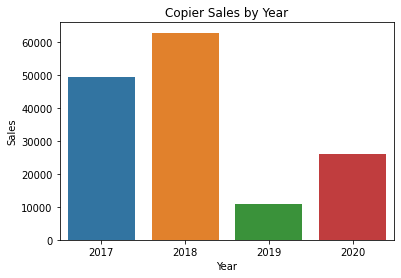

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

#Visualizes Copier Sales by year through bar graph.

JustCopierYearsSales = JustCopiersYears[["Year", "Sales"]].groupby(by="Year").sum()
JustCopierYearsSales = JustCopierYearsSales.reset_index()

barchart1 = sns.barplot(x="Year", y="Sales", data = JustCopierYearsSales)
barchart1.set_title("Copier Sales by Year")
plt.show()

#try to show how Copiers performed year by year.
#try to show Copiers Sales by region as well.
#how can we figure out what kind of customer base is mostly purchasing Copiers? ('Ship Mode'?)


<function matplotlib.pyplot.show>

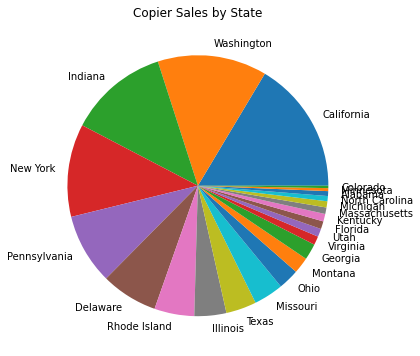

In [4]:
import pandas as pd
xl = pd.ExcelFile("/content/TableauSalesData.xlsx")
SalesData = xl.parse("Orders")

#Visualizes Copier Sales in a pie chart organized by each state.

import matplotlib.pyplot as plt
JustCopiers = SalesData.loc[SalesData["Sub-Category"]=="Copiers"]
JustCopiersStates = JustCopiers.copy()
JustCopierStatesSales = JustCopiersStates[["State", "Sales"]].groupby(by="State").sum().sort_values("Sales",ascending = False)

JustCopierStatesSales = JustCopierStatesSales.reset_index()

plt.figure(figsize=(6,6))

plt.title("Copier Sales by State")

plt.pie(JustCopierStatesSales.Sales, labels=JustCopierStatesSales.State)
plt.show

In [5]:
JustCopiers = SalesData.loc[SalesData["Sub-Category"]=="Copiers"]
JustCopiersStates = JustCopiers.copy()

#Prints Sales and Profit of Copiers sub-category ranked by state.

JustCopiersStates["Percent"] = JustCopiersStates["Profit"]/JustCopiersStates["Sales"]

JustCopierStatesSales = JustCopiersStates[["State", "Sales","Profit","Percent"]].groupby(by="State").sum().sort_values("Percent", ascending=False)
print("Copier Sales by State")
print("\n")
print(JustCopierStatesSales)
JustCopierStatesSales = JustCopierStatesSales.reset_index()
print("\n******")
print(JustCopierStatesSales)

Copier Sales by State


                    Sales     Profit   Percent
State                                         
California      24559.520  7889.8519  5.087500
Washington      20249.830  9442.4242  2.090000
New York        17199.840  5839.9500  2.025000
Texas            5639.872  1629.9615  1.600000
Illinois         5919.888  1831.9666  1.187500
Rhode Island     7399.870  3491.9388  0.930000
Indiana         18499.930  8849.9670  0.930000
Missouri         5499.920  2536.9632  0.860000
Michigan         1149.970   484.9880  0.850000
Pennsylvania    13079.868  1735.9829  0.650000
Florida          1439.968   401.9918  0.512500
Minnesota         549.990   274.9950  0.500000
Georgia          2999.950  1439.9760  0.480000
Delaware        10499.970  5039.9856  0.480000
Virginia         1599.920   751.9624  0.470000
Ohio             3839.934   446.9923  0.466667
Montana          2999.950  1379.9770  0.460000
Kentucky         1399.980   629.9910  0.450000
Massachusetts    1199.980   467.9922

In [6]:
JustCopiers = SalesData.loc[SalesData["Sub-Category"]=="Copiers"]

#Prints profit of Copiers by Segment.

CopierSegment = JustCopiers[["Segment", "Profit", "Sales"]]
SegTotalProfSales = CopierSegment.groupby(by="Segment").sum().sort_values(by = "Profit",ascending=False)
print("Results of Segments from Copier Sales")
print("\n")
print(SegTotalProfSales)

Results of Segments from Copier Sales


                 Profit      Sales
Segment                           
Consumer     24083.7106  69819.070
Corporate    18990.2789  46829.386
Home Office  12543.8354  32879.574


In [7]:
import pandas as pd

#Prints list of products of Copiers sub-category, sorted by performance of profit and sales.
xl = pd.ExcelFile("/content/TableauSalesData.xlsx")
SalesData = xl.parse("Orders")
JustCopiers = SalesData.loc[SalesData["Sub-Category"]=="Copiers"]
CopierProf = JustCopiers[["Product Name", "Profit", "Sales"]].groupby("Product Name").sum().sort_values("Profit", ascending = False)
print(CopierProf)

                                                        Profit      Sales
Product Name                                                             
Canon imageCLASS 2200 Advanced Copier               25199.9280  61599.824
Hewlett Packard LaserJet 3310 Copier                 6983.8836  18839.686
Canon PC1060 Personal Laser Copier                   4570.9347  11619.834
Hewlett Packard 610 Color Digital Copier / Printer   3124.9375   8899.822
Canon Imageclass D680 Copier / Fax                   2799.9600   8959.872
Canon PC940 Copier                                   2092.4535   5669.874
Sharp AL-1530CS Digital Copier                       2064.9587   6399.872
Canon PC1080F Personal Copier                        1973.9671   5999.900
Canon Image Class D660 Copier                        1691.9718   3959.934
Sharp 1540cs Digital Laser Copier                    1649.9700   4399.920
Canon PC-428 Personal Copier                         1469.9265   4119.794
Brother DCP1000 Digital 3 in 1 Multifu

In [8]:
#Prints Products of Copiers sub-category, sorted by sales and shows quantities sold.

JustCopiers = SalesData.loc[SalesData["Sub-Category"]=="Copiers"]
CopierQuantity = JustCopiers[["Product Name", "Sales", "Quantity"]].groupby("Product Name").sum().sort_values("Sales", ascending = False)
print(CopierQuantity)

                                                        Sales  Quantity
Product Name                                                           
Canon imageCLASS 2200 Advanced Copier               61599.824        20
Hewlett Packard LaserJet 3310 Copier                18839.686        38
Canon PC1060 Personal Laser Copier                  11619.834        19
Canon Imageclass D680 Copier / Fax                   8959.872        16
Hewlett Packard 610 Color Digital Copier / Printer   8899.822        21
Sharp AL-1530CS Digital Copier                       6399.872        17
Canon PC1080F Personal Copier                        5999.900        11
Canon PC940 Copier                                   5669.874        15
Brother DCP1000 Digital 3 in 1 Multifunction Ma...   4859.838        19
Sharp 1540cs Digital Laser Copier                    4399.920        10
Hewlett Packard 310 Color Digital Copier             4199.860        16
Canon PC-428 Personal Copier                         4119.794   

In [9]:
#Prints top-buying customers, segments, and quantity by state.

TopSeller = SalesData.loc[SalesData["Product Name"]=="Canon imageCLASS 2200 Advanced Copier"]

TopCustomers = TopSeller[["Segment","Customer Name", "Quantity"]].groupby("Customer Name").sum().sort_values("Quantity", ascending = False)
TopSegments = TopSeller[["Segment", "Customer Name", "Quantity"]].groupby("Segment").sum().sort_values("Quantity", ascending = False)
TopStates = TopSeller[["State","Quantity"]].groupby("State").sum().sort_values("Quantity", ascending = False)
print(TopCustomers)
print(TopSegments)
print(TopStates)

                    Quantity
Customer Name               
Tamara Chand               5
Christopher Conant         4
Raymond Buch               4
Tom Ashbrook               4
Hunter Lopez               3
             Quantity
Segment              
Consumer           11
Corporate           5
Home Office         4
              Quantity
State                 
Indiana              5
New York             4
Pennsylvania         4
Washington           4
Delaware             3


In [10]:
#Displays purchase history of customers.

Tamara = SalesData.loc[SalesData["Customer Name"]=="Tamara Chand"]
Christopher = SalesData.loc[SalesData["Customer Name"]=="Christopher Conant"]
Raymond = SalesData.loc[SalesData["Customer Name"]=="Raymond Buch"]
Tom = SalesData.loc[SalesData["Customer Name"]=="Tom Ashbrook"]
Hunter = SalesData.loc[SalesData["Customer Name"]=="Hunter Lopez"]

TamaraPurchases = Tamara[["Product Name","Sub-Category"]].groupby("Product Name").sum().sort_values("Sub-Category")
ChristopherPurchases = Christopher[["Product Name","Sub-Category"]].groupby("Product Name").sum().sort_values("Sub-Category")
RaymondPurchases = Raymond[["Product Name", "Sub-Category"]].groupby("Product Name").sum().sort_values("Sub-Category")
TomPurchases = Tom[["Product Name", "Sub-Category"]].groupby("Product Name").sum().sort_values("Sub-Category")
HunterPurchases = Hunter[["Product Name", "Sub-Category"]].groupby("Product Name").sum().sort_values("Sub-Category")
print("Tamara")
display(TamaraPurchases)
print("Christopher")
display(ChristopherPurchases)
print("Raymond")
display(RaymondPurchases)
print("Tom")
display(TomPurchases)
print("Hunter")
display(HunterPurchases)

Tamara


,Sub-Category
Product Name,
Enermax Acrylux Wireless Keyboard,Accessories
Stanley Bostitch Contemporary Electric Pencil Sharpeners,Art
"Acco Pressboard Covers with Storage Hooks, 14 7/8"" x 11"", Light Blue",Binders
Ibico Ibimaster 300 Manual Binding System,Binders
Newell 3-Hole Punched Plastic Slotted Magazine Holders for Binders,Binders
Recycled Premium Regency Composition Covers,Binders
Satellite Sectional Post Binders,Binders
Canon imageCLASS 2200 Advanced Copier,Copiers
Staple envelope,Envelopes


Christopher


,Sub-Category
Product Name,
Avery Legal 4-Ring Binder,Binders
Zipper Ring Binder Pockets,Binders
"Global Leather Task Chair, Black",Chairs
Hon Olson Stacker Stools,Chairs
Canon PC1060 Personal Laser Copier,Copiers
Canon imageCLASS 2200 Advanced Copier,Copiers
"Howard Miller 13"" Diameter Goldtone Round Wall Clock",Furnishings
Xerox 1905,Paper
Xerox 1942,Paper


Raymond


,Sub-Category
Product Name,
Logitech 910-002974 M325 Wireless Mouse for Web Scrolling,Accessories
Holmes 99% HEPA Air Purifier,Appliances
50 Colored Long Pencils,Art
Newell 345,Art
Newell 342,Art
Boston 1645 Deluxe Heavier-Duty Electric Pencil Sharpener,Art
Newell 333,Art
Newell 311,Art
GBC ProClick Spines for 32-Hole Punch,Binders


Tom


,Sub-Category
Product Name,
SanDisk Cruzer 16 GB USB Flash Drive,Accessories
Newell 326,Art
GBC DocuBind P100 Manual Binding Machine,Binders
Canon imageCLASS 2200 Advanced Copier,Copiers
Globe Weis Peel & Seel First Class Envelopes,Envelopes
Deflect-o DuraMat Antistatic Studded Beveled Mat for Medium Pile Carpeting,Furnishings
"Seth Thomas 8 1/2"" Cubicle Clock",Furnishings
Polycom CX600 IP Phone VoIP phone,Phones
i.Sound Portable Power - 8000 mAh,Phones


Hunter


,Sub-Category
Product Name,
Newell 327,Art
Newell 351,Art
Hon 4700 Series Mobuis Mid-Back Task Chairs with Adjustable Arms,Chairs
Canon imageCLASS 2200 Advanced Copier,Copiers
Staple envelope,EnvelopesEnvelopes
"DAX Value U-Channel Document Frames, Easel Back",Furnishings
"Eldon Expressions Desk Accessory, Wood Pencil Holder, Oak",Furnishings
Apple iPhone 5C,Phones
Panasonic KX TS208W Corded phone,Phones


In [11]:
#Displays Product of Copier Sub-Category and discount percentage.

CopiersProduct = JustCopiers[["Product Name", "Profit", "Discount","Quantity"]]
CopiersTotalProfAveDiscount = CopiersProduct.groupby("Product Name").agg({"Profit":'sum',"Discount":'mean'}).sort_values("Profit", ascending = False)
display(CopiersTotalProfAveDiscount)

,Profit,Discount
Product Name,,
Canon imageCLASS 2200 Advanced Copier,25199.9280,0.120000
Hewlett Packard LaserJet 3310 Copier,6983.8836,0.200000
Canon PC1060 Personal Laser Copier,4570.9347,0.150000
Hewlett Packard 610 Color Digital Copier / Printer,3124.9375,0.142857
Canon Imageclass D680 Copier / Fax,2799.9600,0.200000
Canon PC940 Copier,2092.4535,0.200000
Sharp AL-1530CS Digital Copier,2064.9587,0.250000
Canon PC1080F Personal Copier,1973.9671,0.050000
Canon Image Class D660 Copier,1691.9718,0.100000


In [12]:
print(SalesData.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [13]:
#Displays all purchases of Canon imageCLASS 2200 Advanced Copier.

CanonImage = SalesData.loc[SalesData["Product Name"]=="Canon imageCLASS 2200 Advanced Copier"]
CanonDescription = CanonImage[["Product Name","Sub-Category","Category","Segment","Sales","Quantity","Discount","Customer Name","State"]]
display(CanonDescription)

,Product Name,Sub-Category,Category,Segment,Sales,Quantity,Discount,Customer Name,State
649,Canon imageCLASS 2200 Advanced Copier,Copiers,Technology,Consumer,8399.976,4,0.4,Christopher Conant,Pennsylvania
1680,Canon imageCLASS 2200 Advanced Copier,Copiers,Technology,Corporate,17499.950,5,0.0,Tamara Chand,Indiana
3014,Canon imageCLASS 2200 Advanced Copier,Copiers,Technology,Consumer,13999.960,4,0.0,Raymond Buch,Washington
4889,Canon imageCLASS 2200 Advanced Copier,Copiers,Technology,Home Office,11199.968,4,0.2,Tom Ashbrook,New York
5231,Canon imageCLASS 2200 Advanced Copier,Copiers,Technology,Consumer,10499.970,3,0.0,Hunter Lopez,Delaware


**Answer: Market the Canon imageCLASS 2200 Advanced Copier to Consumer Segment, (check California Sales with the Canon PC1060 Personal Laser Copier)**

In [14]:
#Showing top-selling products of Copiers (Nick)
#Must turn into a function

def CopierProfits():
  JustCopiers = SalesData.loc[SalesData["Sub-Category"]=="Copiers"]
  CopierProf = JustCopiers[["Product Name", "Profit", "Sales"]].groupby("Product Name").sum().sort_values("Profit", ascending = False)
  display(CopierProf)

In [21]:
#Projects potential customers of Copiers if marketed to Consumer segment (Nick)
#Must be turned into a function

def CopierProjections():

  PotentialConsumers = SalesData.loc[(SalesData["Segment"]=="Corporate") & (SalesData["Sub-Category"]=="Copiers")]

  PotCons = PotentialConsumers[["Customer Name"]].groupby("Customer Name").sum()
  PotConsCount = len(PotCons.index)-1

  CanonImage = SalesData.loc[SalesData["Product Name"]=="Canon imageCLASS 2200 Advanced Copier"]

  Price = 3499.99

  PriceAndDiscount = str(Price) + str(CanonImage["Discount"])

  AvgProfit = CanonImage["Profit"].mean()

  AvgQuantity = int(CanonImage["Quantity"].mean())

  AvgStonks = AvgProfit/AvgQuantity

  OpportunityCount = int(AvgQuantity * PotConsCount)
  ProjectedSales = Price * OpportunityCount
  ProjectedProfit = AvgStonks * OpportunityCount

  FormatPS = "{:.2f}".format(ProjectedSales)
  FormatAP = "{:.2f}".format(AvgProfit)
  FormatPP = "{:.2f}".format(ProjectedProfit)
  print("\n")
  print("*" * 100)
  print("Projected Sales for Copiers: ")
  print("-" * 100)
  print(str(PotConsCount) + " Potential Customers")
  print("-" * 100)
  print("Average Number of Units: " + str(AvgQuantity))
  print("-" * 100)
  print(str(OpportunityCount) + " potential yield of units sold")
  print("-" * 100)
  print("Projected Sales is: " + "$" + str(FormatPS))
  print("-" * 100)
  print("Mean profit margin of Canon imageCLASS 2200 Advanced Copier: " + "$" + str(FormatAP))
  print("-" * 100)
  print("Projected Profit: " + "$" + str(FormatPP))
  print("*" * 100)

CopierProjections()



****************************************************************************************************
Projected Sales for Copiers: 
----------------------------------------------------------------------------------------------------
18 Potential Customers
----------------------------------------------------------------------------------------------------
Average Number of Units: 4
----------------------------------------------------------------------------------------------------
72 potential yield of units sold
----------------------------------------------------------------------------------------------------
Projected Sales is: $251999.28
----------------------------------------------------------------------------------------------------
Mean profit margin of Canon imageCLASS 2200 Advanced Copier: $5039.99
----------------------------------------------------------------------------------------------------
Projected Profit: $90719.74
*************************************************

In [20]:
#Displays top customers, top segments, and top states purchasing the Canon imageCLASS 2200 Advanced Copier. (Nick)

def TopSeller():

  TopSeller = SalesData.loc[SalesData["Product Name"]=="Canon imageCLASS 2200 Advanced Copier"]

  TopCustomers = TopSeller[["Segment","Customer Name", "Quantity"]].groupby("Customer Name").sum().sort_values("Quantity", ascending = False)
  TopSegments = TopSeller[["Segment", "Customer Name", "Quantity"]].groupby("Segment").sum().sort_values("Quantity", ascending = False)
  TopStates = TopSeller[["State","Quantity"]].groupby("State").sum().sort_values("Quantity", ascending = False)
  
  print("\n")
  print("*" * 100)
  print("\n")
  print("Statistics about Canon imageCLASS 2200 Copier")
  print("\n")
  print("-" * 100)
  print("\n")
  print("Top Customers")
  print("\n")
  print(TopCustomers)
  print("\n")
  print("-" * 100)
  print("\n")
  print("Top Segments")
  print("\n")
  print(TopSegments)
  print("\n")
  print("-" * 100)
  print("\n")
  print("Top States")
  print("\n")
  print(TopStates)
  print("\n")
  print("*" * 100)

TopSeller()



****************************************************************************************************


Statistics about Canon imageCLASS 2200 Copier


----------------------------------------------------------------------------------------------------


Top Customers


                    Quantity
Customer Name               
Tamara Chand               5
Christopher Conant         4
Raymond Buch               4
Tom Ashbrook               4
Hunter Lopez               3


----------------------------------------------------------------------------------------------------


Top Segments


             Quantity
Segment              
Consumer           11
Corporate           5
Home Office         4


----------------------------------------------------------------------------------------------------


Top States


              Quantity
State                 
Indiana              5
New York             4
Pennsylvania         4
Washington           4
Delaware             3


**************

In [17]:
Corporate = SalesData.loc[SalesData["Segment"]=="Corporate"]
CorporateSales = Corporate["Sales"].sum()
TenPercentGoal = CorporateSales * 1.1
Difference = TenPercentGoal - CorporateSales
print(CorporateSales)
print(TenPercentGoal)
print(Difference)

706146.3668
776761.0034800001
70614.63668000011


In [18]:
SubCat = SalesData[["Sub-Category","Profit","Sales"]].groupby("Sub-Category").sum().sort_values("Profit", ascending = False)
print(SubCat)

                  Profit        Sales
Sub-Category                         
Copiers       55617.8249  149528.0300
Phones        44515.7306  330007.0540
Accessories   41936.6357  167380.3180
Paper         34053.5693   78479.2060
Binders       30221.7633  203412.7330
Chairs        26590.1663  328449.1030
Storage       21278.8264  223843.6080
Appliances    18138.0054  107532.1610
Furnishings   13059.1436   91705.1640
Envelopes      6964.1767   16476.4020
Art            6527.7870   27118.7920
Labels         5546.2540   12486.3120
Machines       3384.7569  189238.6310
Fasteners       949.5182    3024.2800
Supplies      -1189.0995   46673.5380
Bookcases     -3472.5560  114879.9963
Tables       -17725.4811  206965.5320
